# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

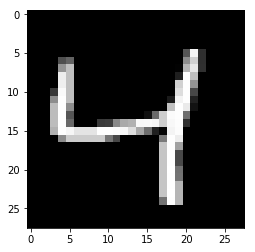

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6873
Epoch: 1/20... Training loss: 0.6837
Epoch: 1/20... Training loss: 0.6797
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6686
Epoch: 1/20... Training loss: 0.6599
Epoch: 1/20... Training loss: 0.6517
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6314
Epoch: 1/20... Training loss: 0.6180
Epoch: 1/20... Training loss: 0.6024
Epoch: 1/20... Training loss: 0.5910
Epoch: 1/20... Training loss: 0.5707
Epoch: 1/20... Training loss: 0.5529
Epoch: 1/20... Training loss: 0.5373
Epoch: 1/20... Training loss: 0.5189
Epoch: 1/20... Training loss: 0.4976
Epoch: 1/20... Training loss: 0.4799
Epoch: 1/20... Training loss: 0.4665
Epoch: 1/20... Training loss: 0.4452
Epoch: 1/20... Training loss: 0.4325
Epoch: 1/20... Training loss: 0.4121
Epoch: 1/20... Training loss: 0.3974
Epoch: 1/20... Training loss: 0.3903
Epoch: 1/20... Training loss: 0.3723
E

Epoch: 2/20... Training loss: 0.1782
Epoch: 2/20... Training loss: 0.1745
Epoch: 2/20... Training loss: 0.1790
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1775
Epoch: 2/20... Training loss: 0.1720
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1717
Epoch: 2/20... Training loss: 0.1798
Epoch: 2/20... Training loss: 0.1695
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1749
Epoch: 2/20... Training loss: 0.1771
Epoch: 2/20... Training loss: 0.1739
Epoch: 2/20... Training loss: 0.1802
Epoch: 2/20... Training loss: 0.1682
Epoch: 2/20... Training loss: 0.1750
Epoch: 2/20... Training loss: 0.1732
Epoch: 2/20... Training loss: 0.1726
Epoch: 2/20... Training loss: 0.1781
Epoch: 2/20... Training loss: 0.1689
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1705
Epoch: 2/20... Training loss: 0.1758
Epoch: 2/20... Training loss: 0.1757
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1709
E

Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1483
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1418
E

Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1245
E

Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1167
E

Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1027
E

Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0924
E

Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0990
E

Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0899
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0942
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

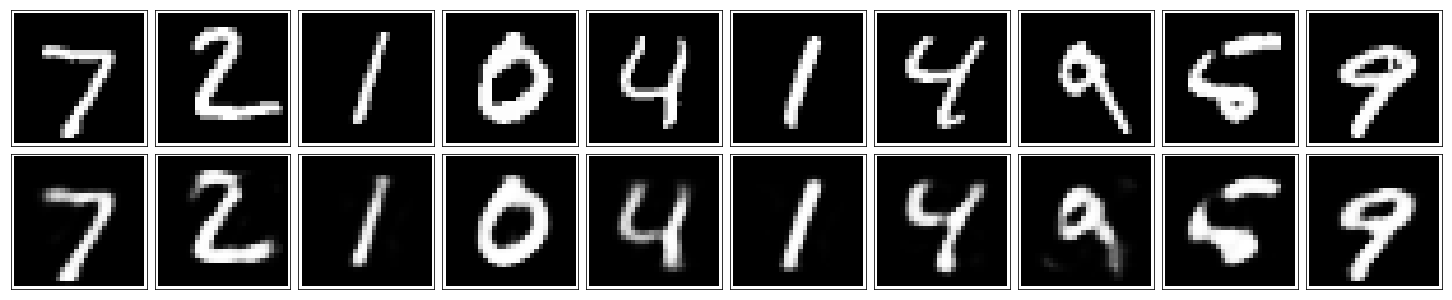

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.